# Student Test Score Analysis

This notebook performs exploratory data analysis on the student test score dataset.

## Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Load Data

In [19]:
train_df = pd.read_csv('data/train.csv')

## Basic Data Exploration

In [20]:
train_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [21]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  str    
 3   course            630000 non-null  str    
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  str    
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  str    
 9   study_method      630000 non-null  str    
 10  facility_rating   630000 non-null  str    
 11  exam_difficulty   630000 non-null  str    
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), str(7)
memory usage: 62.5 MB


In [22]:
train_df.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


## Check for Missing Values

In [23]:
train_df.isnull().sum()

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

## Analyze Target Variable Distribution

In [24]:
train_df['exam_score'].value_counts()

exam_score
100.000    15458
19.599      6336
69.400      1740
61.300      1683
67.300      1660
           ...  
22.800        71
20.500        70
20.100        55
22.400        54
21.900        35
Name: count, Length: 805, dtype: int64

## Correlation Analysis

In [25]:
correlation_matrix = train_df.corr(numeric_only=True)
correlation_matrix['exam_score'].sort_values(ascending=False)

exam_score          1.000000
study_hours         0.762267
class_attendance    0.360954
sleep_hours         0.167410
age                 0.010472
id                  0.000372
Name: exam_score, dtype: float64

## Visualizations

Now let's create visualizations to better understand the data patterns and relationships.

### Distribution of Exam Scores

Let's visualize the distribution of the target variable to understand its spread and central tendency.

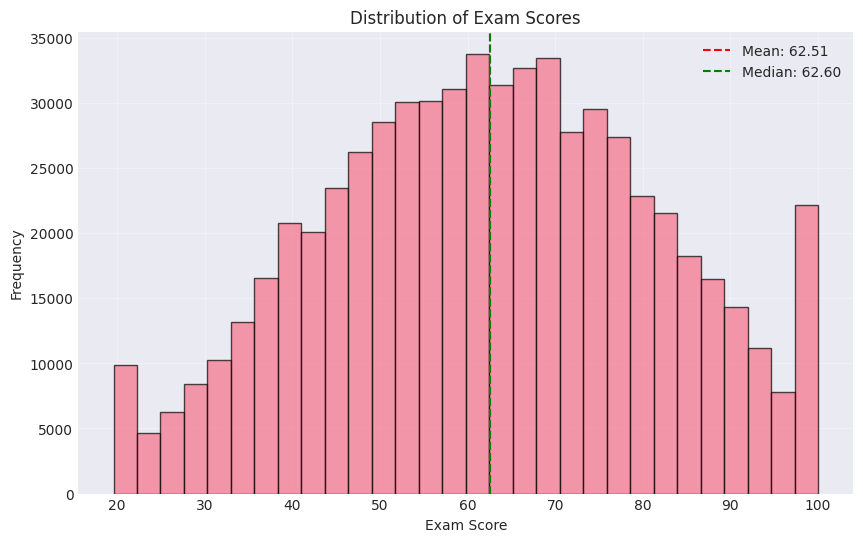

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['exam_score'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.axvline(train_df['exam_score'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["exam_score"].mean():.2f}')
plt.axvline(train_df['exam_score'].median(), color='green', linestyle='--', label=f'Median: {train_df["exam_score"].median():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Correlation Heatmap

A heatmap helps us visualize the strength and direction of relationships between numeric features.

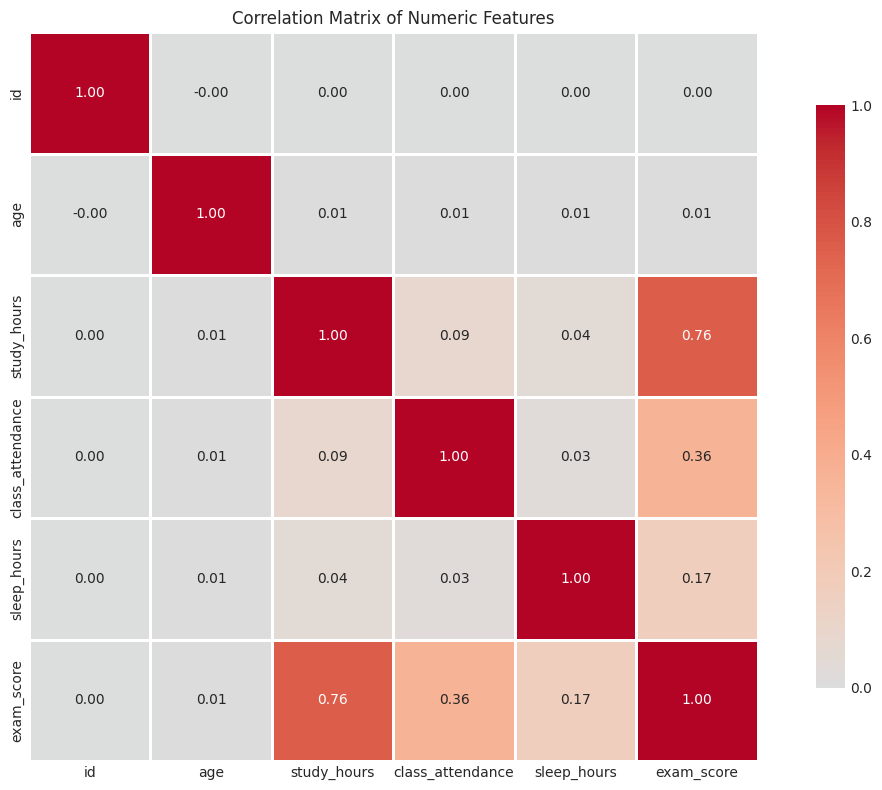

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

### Top Correlations with Exam Score

Let's visualize the features that have the strongest correlation with exam scores.

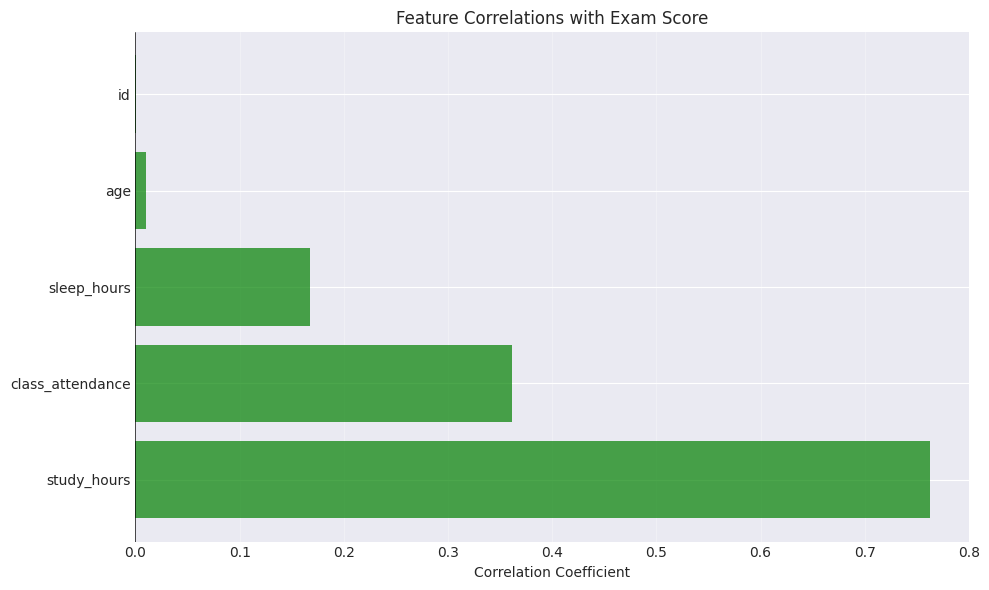

In [28]:
# Get correlations with exam_score and sort them
corr_with_target = correlation_matrix['exam_score'].sort_values(ascending=False)
# Exclude the target itself
corr_with_target = corr_with_target[corr_with_target.index != 'exam_score']

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in corr_with_target.values]
plt.barh(corr_with_target.index, corr_with_target.values, color=colors, alpha=0.7)
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlations with Exam Score')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Distribution of Numeric Features

Let's examine the distribution of key numeric features in the dataset.

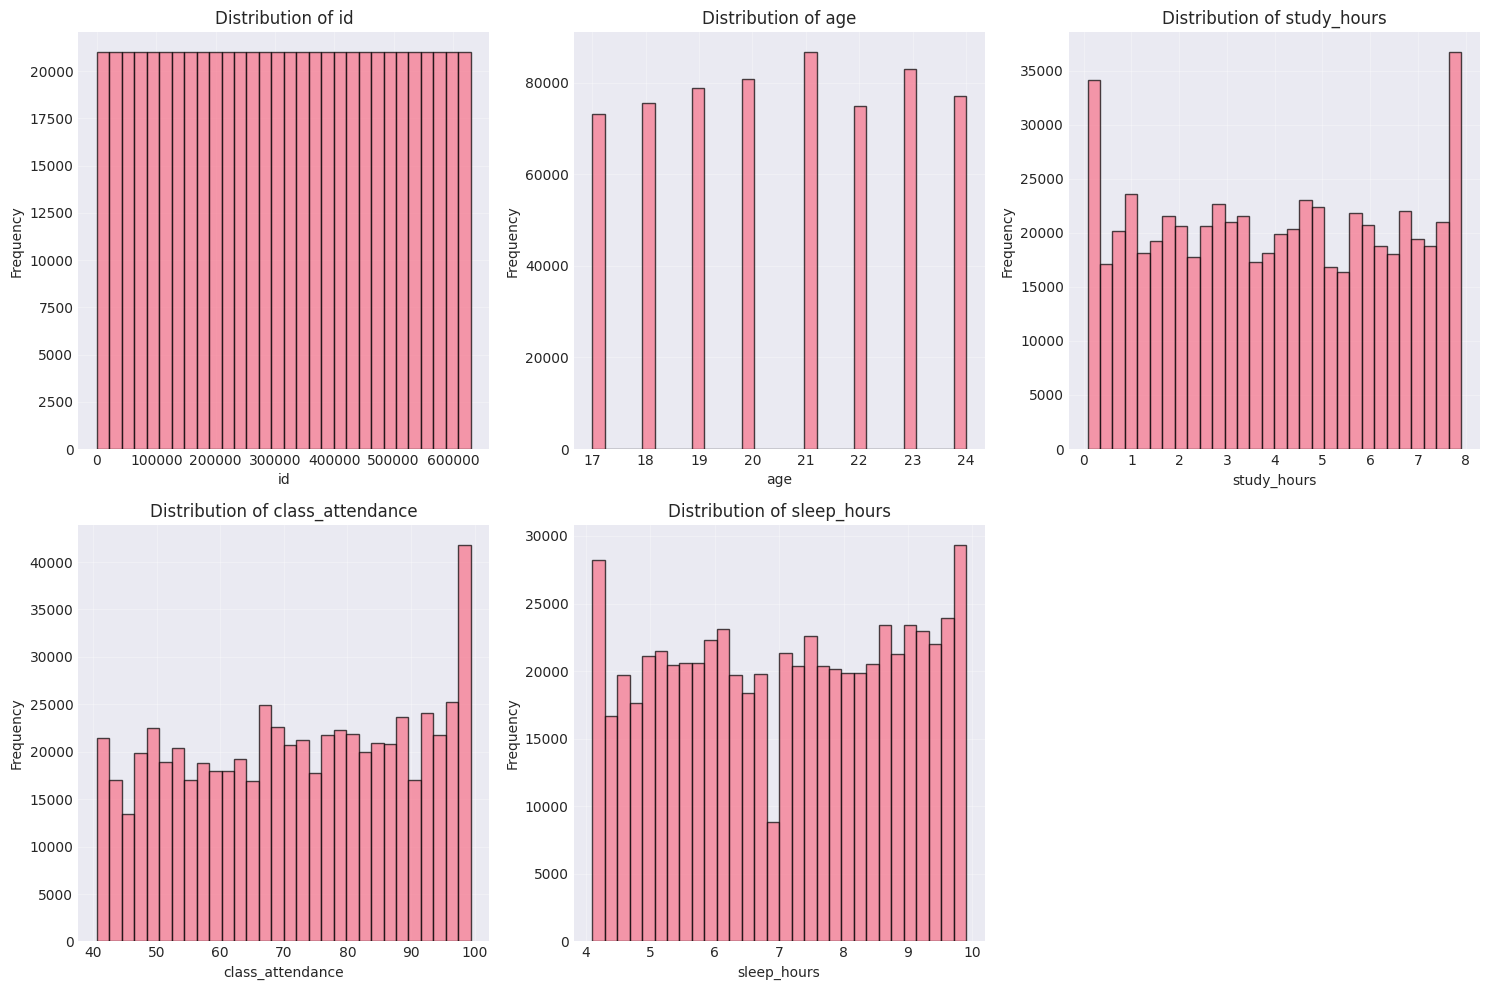

In [29]:
# Get numeric columns (excluding the target)
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'exam_score']

# Create subplots for each numeric feature
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(train_df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### Scatter Plots: Features vs Exam Score

Let's visualize the relationship between the most correlated features and exam scores using scatter plots.

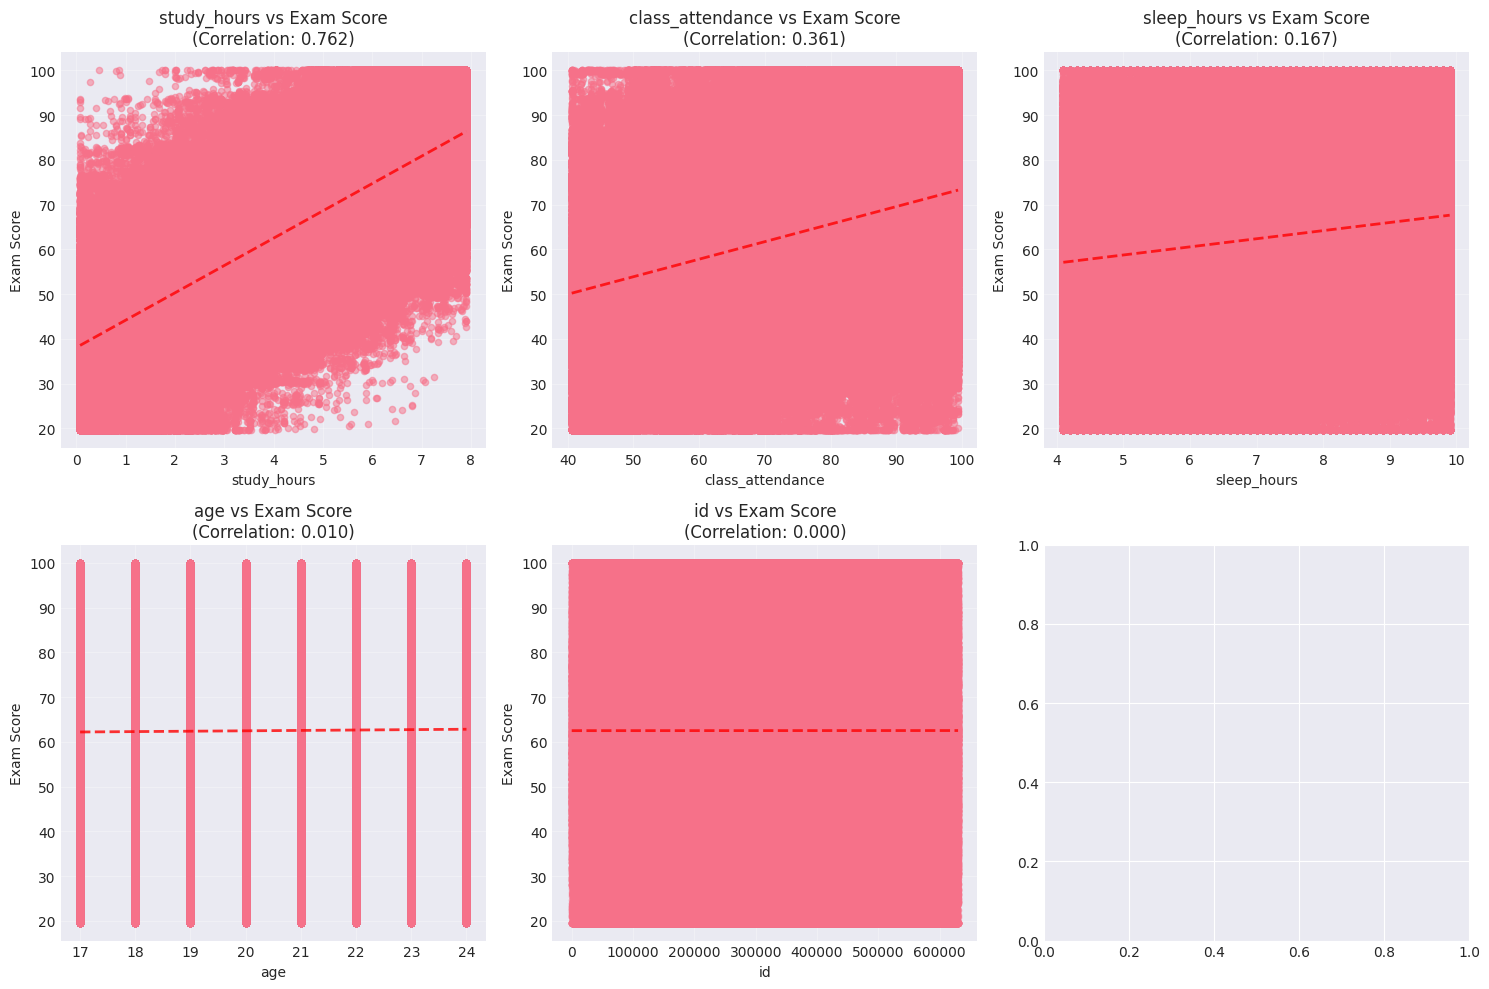

In [30]:
# Get top 6 correlated features (by absolute value, excluding exam_score)
top_features = corr_with_target.abs().sort_values(ascending=False).head(6).index.tolist()

# Create scatter plots
n_cols = 3
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(train_df[feature], train_df['exam_score'], alpha=0.5, s=20)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Exam Score')
    axes[idx].set_title(f'{feature} vs Exam Score\n(Correlation: {corr_with_target[feature]:.3f})')
    axes[idx].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(train_df[feature].dropna(), train_df.loc[train_df[feature].notna(), 'exam_score'], 1)
    p = np.poly1d(z)
    axes[idx].plot(train_df[feature].dropna().sort_values(), 
                   p(train_df[feature].dropna().sort_values()), 
                   "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

### Box Plots: Exam Scores by Categorical Features

Box plots help us understand how exam scores vary across different categories.

/tmp/ipykernel_16075/1158951636.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()


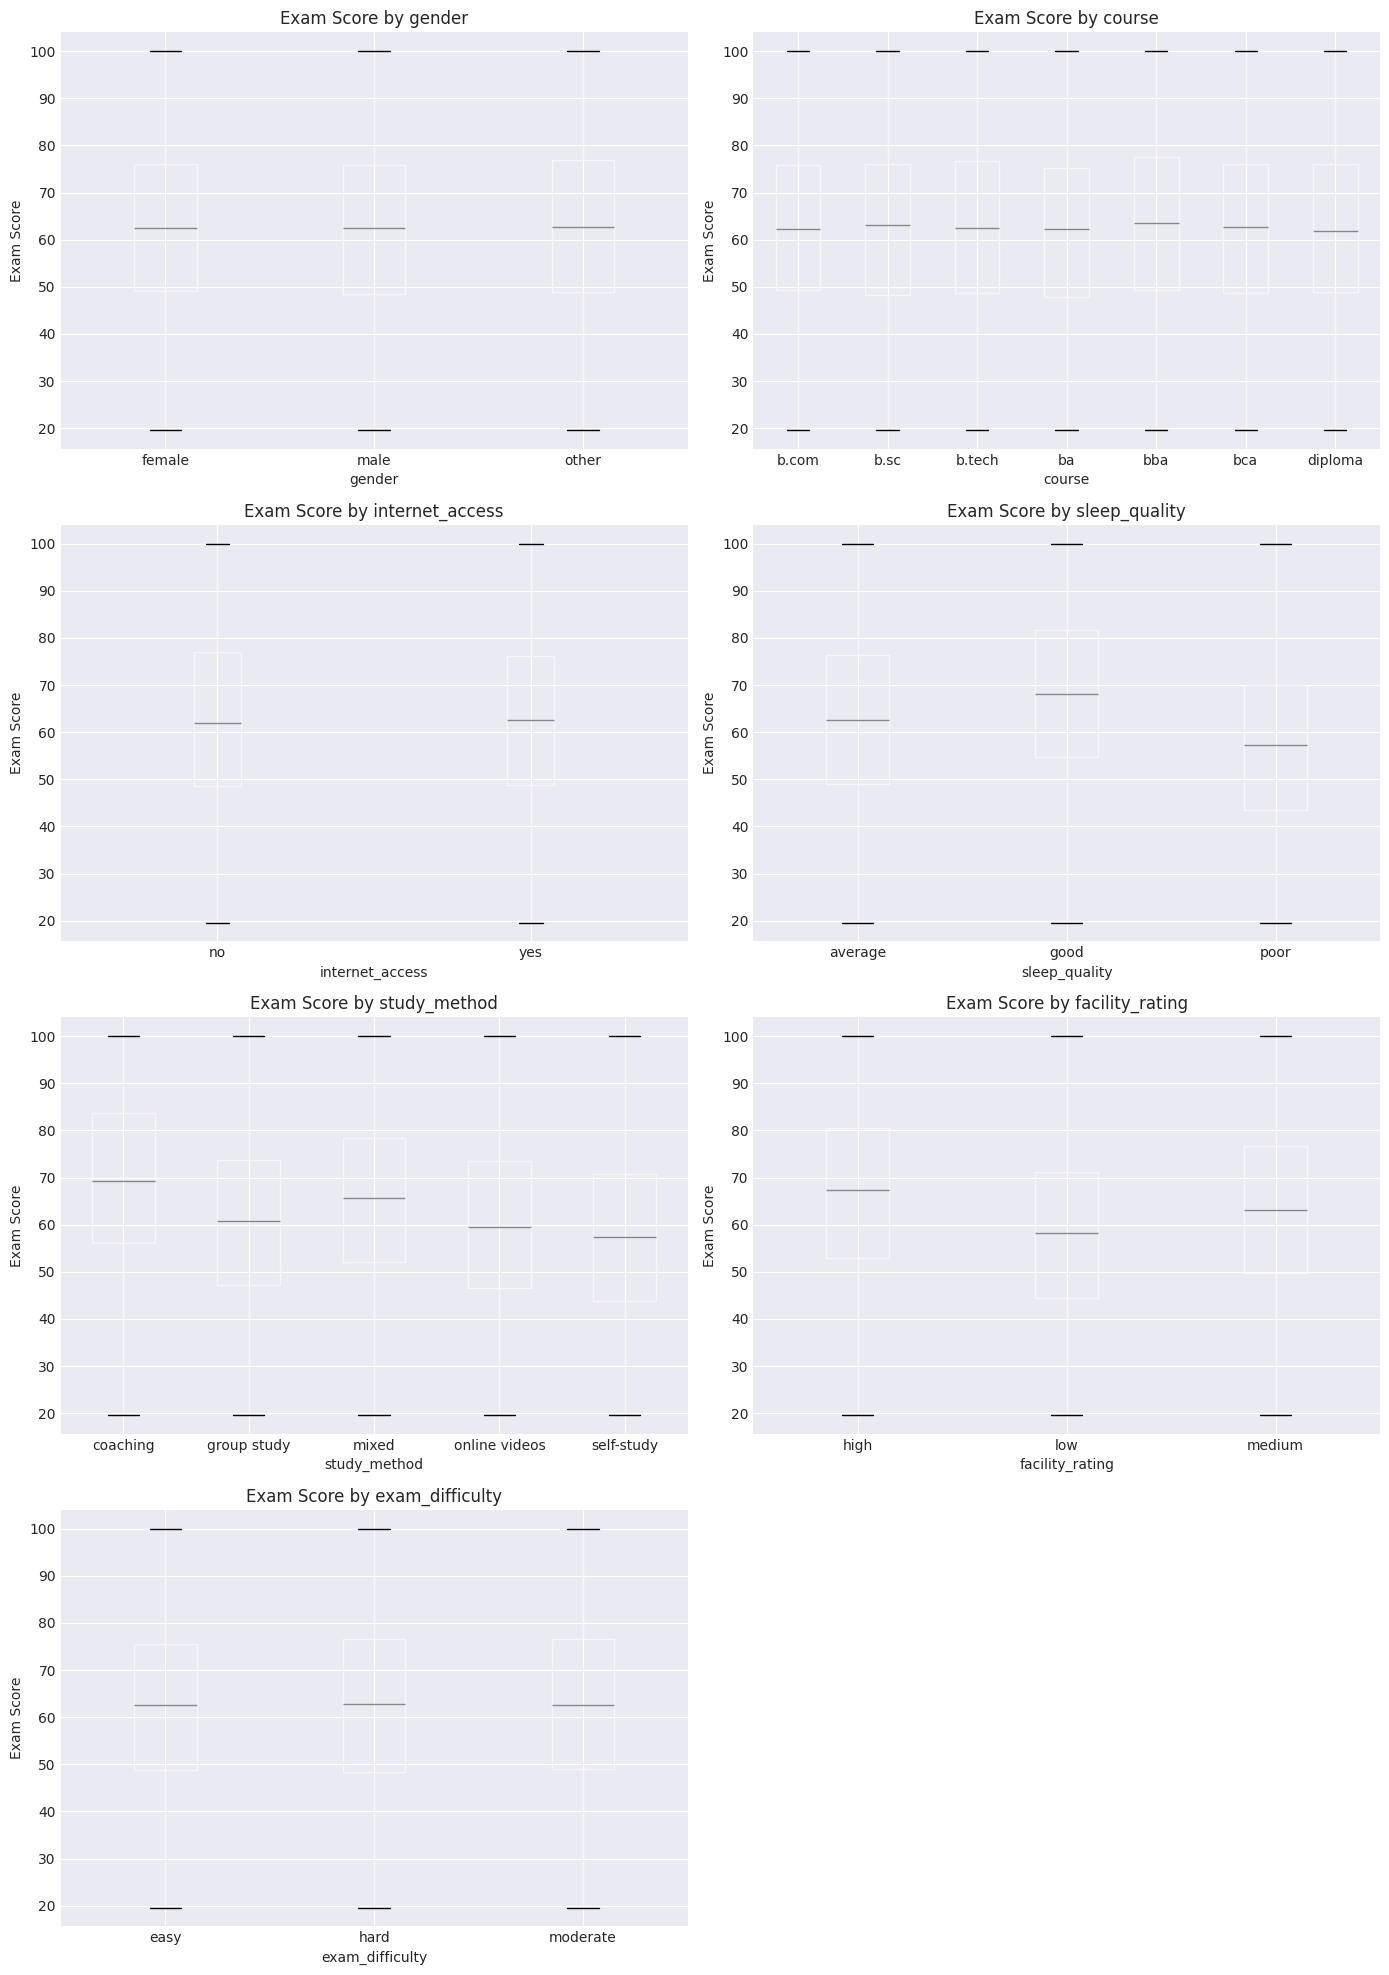

In [31]:
# Get categorical columns
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

if categorical_cols:
    # Create box plots for categorical features
    n_cols = 2
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    for idx, col in enumerate(categorical_cols):
        train_df.boxplot(column='exam_score', by=col, ax=axes[idx])
        axes[idx].set_title(f'Exam Score by {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Exam Score')
        axes[idx].get_figure().suptitle('')  # Remove default title
    
    # Hide extra subplots
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical features found in the dataset.")

## Key Insights

Based on the exploratory data analysis:

1. **Target Distribution**: The exam score distribution shows the central tendency and spread of student performance.

2. **Feature Correlations**: The correlation heatmap and bar chart reveal which features have the strongest relationships with exam scores (both positive and negative).

3. **Feature Distributions**: Understanding the distribution of each feature helps identify potential outliers and data quality issues.

4. **Relationships**: The scatter plots with trend lines show how individual features relate to exam performance, helping identify potential predictive patterns.

5. **Categorical Impact**: Box plots (if categorical features exist) show how different categories affect exam scores, revealing potential grouping patterns.

These visualizations provide a comprehensive understanding of the data and will guide feature engineering and model selection in the next steps.